# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st  
import numpy as np

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Study_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
Study_df.head()
# Display the data table for preview
Study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(Study_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = Study_df[Study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_for_duplicates = Study_df[Study_df['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
data_for_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
duplicate_mouse_entries = Study_df[Study_df['Mouse ID'] == 'g989']
duplicate_mouse_entries


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_study_df = Study_df.drop_duplicates(subset='Mouse ID', keep='first')

# Create a clean DataFrame by dropping the duplicate mouse by its ID ('g989')
clean_study_df = Study_df[Study_df['Mouse ID'] != 'g989']

# Display the clean DataFrame
clean_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_2 = len(clean_study_df["Mouse ID"].unique())
number_of_mice_2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Defining the functions
summary_functions = ['mean', 'median', 'var', 'std', 'sem']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume
mean = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Std Deviation': std,
    'SEM': sem
})

 # Display the summary DataFrame
summary_df




,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_df = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Std Deviation', 'std'),
    ('SEM', 'sem')
]).reset_index()

# Set 'Drug Regimen' as the index
summary_statistics_df.set_index('Drug Regimen', inplace=True)

# Display the summary DataFrame
summary_statistics_df


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

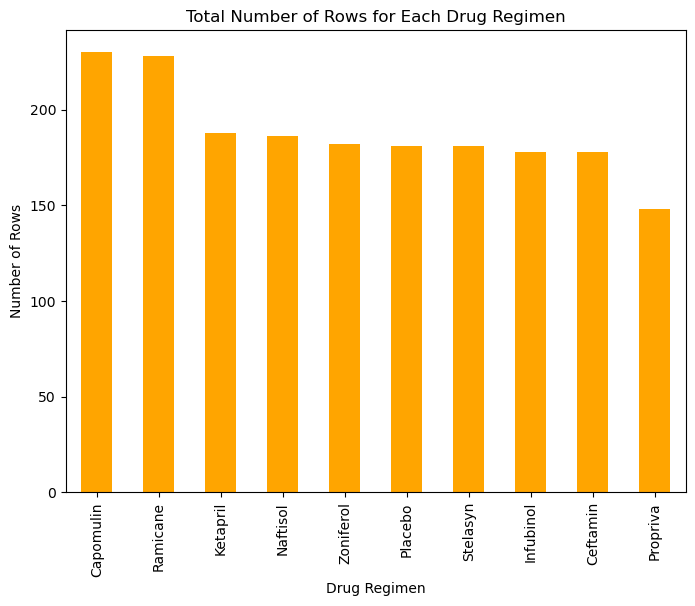

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
no_of_rows = clean_study_df['Drug Regimen'].value_counts()

 # Create a bar chart 
no_of_rows.plot(kind='bar', facecolor='orange', figsize=(8,6),
                                title='Total Number of Rows for Each Drug Regimen',
                                xlabel='Drug Regimen',
                                ylabel='Number of Rows')


# Show the plot
plt.show()

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
no_of_rows = clean_study_df['Drug Regimen'].value_counts()

# Establishing the axis
drug_regimens = no_of_rows.index
num_rows = no_of_rows.values

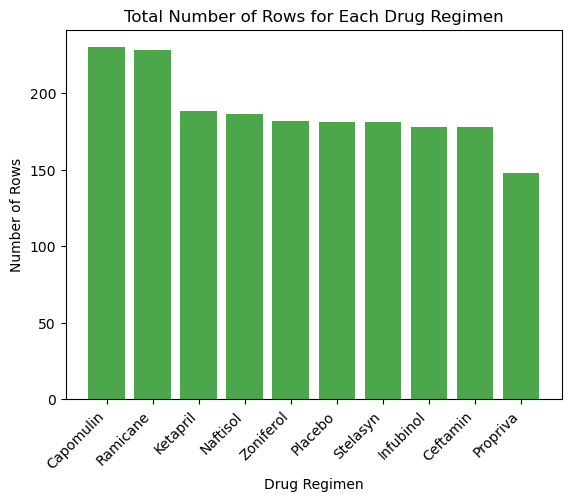

In [12]:
# Plot bar chart
plt.bar(drug_regimens, num_rows, color='green', alpha=0.7, align='center')

# Add labels and title
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Configure x-tick rotation
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

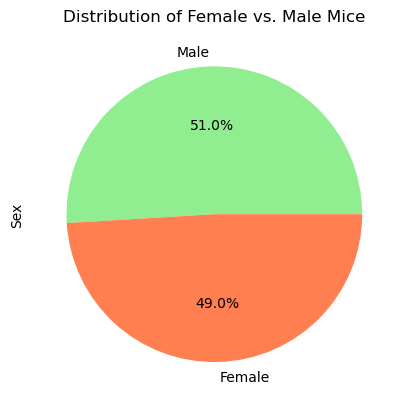

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by 'Sex' and count the number of unique mice
sex_distribution = clean_study_df['Sex'].value_counts()

# Create a pie plot using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'coral'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


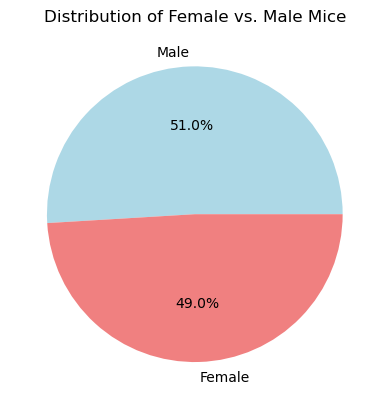

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by 'Sex' and count the number of unique mice
sex_distribution = clean_study_df['Sex'].value_counts()
# Set labels
labels = ['Female', 'Male']

# The values of each section of the pie chart
sizes = [sex_distribution]

# Create a pie plot using Matplotlib's pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_study_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the 'Mouse ID')['Timepoint']tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_study_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter for the specified treatment regimens
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(selected_regimens)]

# Select relevant columns (Mouse ID, Drug Regimen, and Tumor Volume)
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


# Display or use the final_tumor_volume_df as needed
final_tumor_volume_df


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
238,y769,Ceftamin,68.594745
239,y793,Capomulin,31.896238
240,y865,Ceftamin,64.729837
244,z578,Ramicane,30.638696


In [16]:
# Put treatments into a list for the for loop (and later for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Iterate over treatments
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    
    # add subset 
    tumor_vol = treatment_data['Tumor Volume (mm3)']
    tumor_volume.append(tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25, .75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    IQR = upperQ - lowerQ
    
    lower_bound = lowerQ - 1.5 * IQR
    upper_bound = upperQ + 1.5 * IQR
    
    # Identify and print outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)].values
    print(f"{treatment}'s potential outliers: {outliers}")
    print(f"The interquartile range of treatments is: {IQR}")


Capomulin's potential outliers: []
The interquartile range of treatments is: 7.781863460000004
Ramicane's potential outliers: []
The interquartile range of treatments is: 9.098536719999998
Infubinol's potential outliers: [36.3213458]
The interquartile range of treatments is: 11.477135160000003
Ceftamin's potential outliers: []
The interquartile range of treatments is: 15.577752179999997


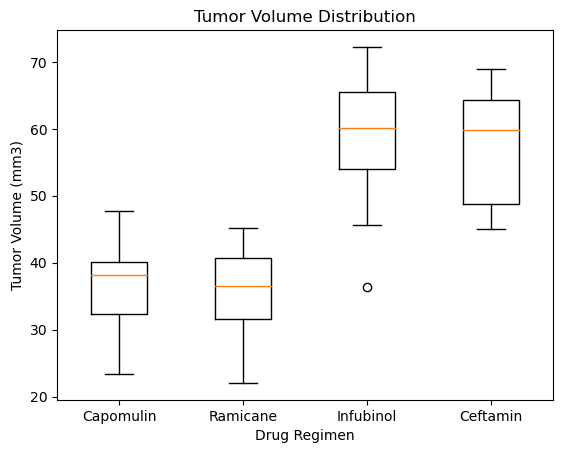

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels=treatments)
plt.title('Tumor Volume Distribution')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

s185


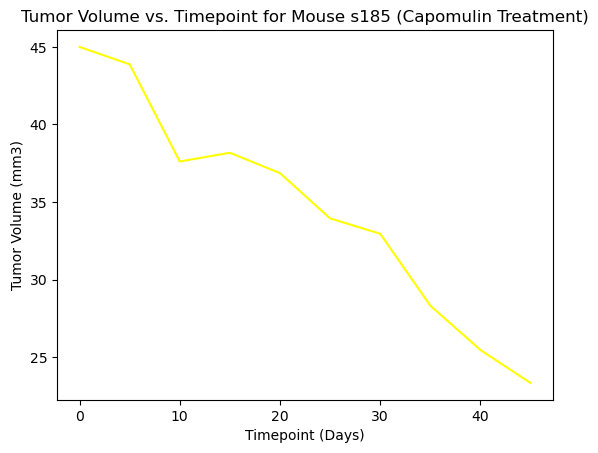

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select the mouse ID with the specific treatment & filter the data for the selected mouse and Capomulin treatment
mouse_id = Study_df[Study_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].tolist()[0]
# Print the mouse ID
print(mouse_id)

mouse_id = 's185'  

capomulin_data = clean_study_df[(clean_study_df['Drug Regimen'] == 'Capomulin') & (clean_study_df['Mouse ID'] == mouse_id)]
capomulin_data
# Generate a line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', color='yellow')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


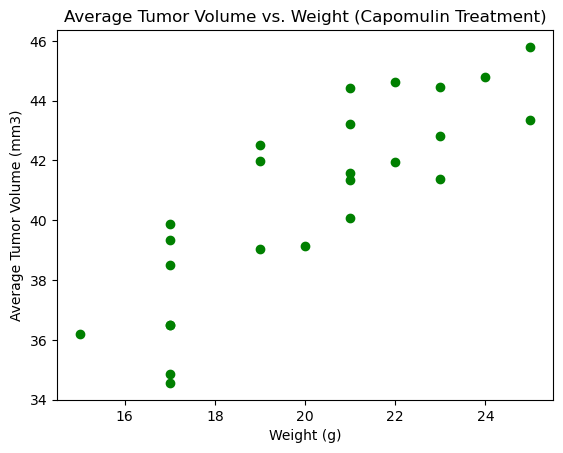

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
full_capomulin_data = clean_study_df[clean_study_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = full_capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_volume_df = pd.DataFrame({
    'Weight (g)': full_capomulin_data.groupby('Mouse ID')['Weight (g)'].unique(),  
    'Average Tumor Volume (mm3)': average_tumor_volume
}).reset_index()
avg_tumor_volume_df
# Plot scatter gragh
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Average Tumor Volume (mm3)'], color='green')
plt.title('Average Tumor Volume vs. Weight (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

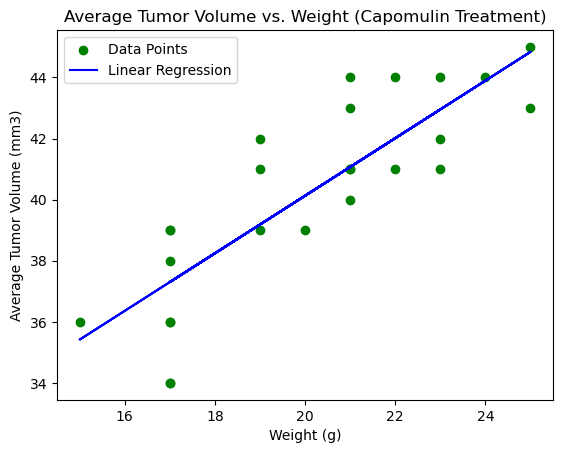

Correlation Coefficient: 0.8414557812129566


In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
avg_tumor_volume_df = avg_tumor_volume_df.astype({'Weight (g)':'int64',
                               'Average Tumor Volume (mm3)':'int64'
                                })
# Calculate the correlation coefficient
correlation_coefficient = avg_tumor_volume_df['Weight (g)'].corr(avg_tumor_volume_df['Average Tumor Volume (mm3)'])
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Average Tumor Volume (mm3)'])

# Generate a scatter plot
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Average Tumor Volume (mm3)'], color='green', label='Data Points')

# Plot the linear regression line
regression_line = slope * avg_tumor_volume_df['Weight (g)'] + intercept
plt.plot(avg_tumor_volume_df['Weight (g)'], regression_line, color='blue', label='Linear Regression')

plt.title('Average Tumor Volume vs. Weight (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

# Print the correlation coefficient and linear regression parameters
print(f'Correlation Coefficient: {correlation_coefficient}')